# Week4授業前課題2 住宅価格を回帰分析しよう

# この課題の目的

- 教師あり学習（回帰問題）の概観を知る
- scikit-laernを使い回帰を行えるようにする
- 手法の簡単な比較をする

# 住宅価格の回帰

- アイオワ州エイムズ市の住宅価格データセットを使い、回帰問題を解く。

- 79種類の特徴量（説明変数）を活用し、住宅価格の数値を推測する問題が設定できる。

- このような連続値のものを推測する問題を回帰問題と呼ぶ。

## 今回使う手法の一覧

scikit-learnを使い以下の手法で学習と推定を行う。

- 線形回帰
- SVM
- 決定木
- ランダムフォレスト


尚、分類問題と回帰問題の両方で使える手法と、そうではない手法が存在する。

# データセットの準備

- Kaggleからデータセットをダウンロードする。

 [House Prices: Advanced Regression Techniques | Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)


- train.csvのみ使用する

In [1353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1354]:
# データセットを読み込む
df = pd.read_csv("train.csv")

In [1355]:
# データセットの先頭５行を確認する
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1356]:
# データの概要を確認する
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# 【課題1】練習のために特徴量の選択

データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出す。

In [1357]:
# 説明変数として、GrLivAreaとYearBuiltを抜き出す
df_X = df[["GrLivArea", "YearBuilt"]]
# X

In [1358]:
# 目的変数としてSalePriceを抜き出す
df_Y = df["SalePrice"]
# Y

# 【課題2】回帰問題のパイプライン

データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れ（パイプライン）を作成・実行する。

 [sklearn.linear_model.LinearRegression — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

評価のための指標値は分類問題と異なり、平均二乗誤差（Mean Squared Error, MSE）を使うことが一般的。

[sklearn.metrics.mean_squared_error — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行える。

In [1359]:
# 説明変数、目的変数の欠損値の有無を確認する
print(df_X.isnull().any()) # 欠損値は存在しない
print("")
print(df_Y.isnull().any()) # 欠損値は存在しない

GrLivArea    False
YearBuilt    False
dtype: bool

False


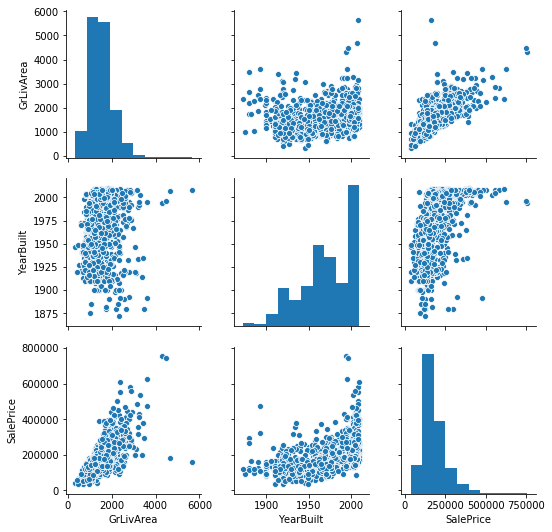

In [1360]:
# 散布図を描く
df_XY = pd.concat([df_X, df_Y], axis = 1)
sns.pairplot(df_XY)

In [1361]:
# 説明変数を正規化する
from sklearn.preprocessing import StandardScaler

# インスタンスを生成
ss = StandardScaler()

# フィッティング
ss.fit(df_XY)

# 正規化
df_XY_std = ss.transform(df_XY)

#  データフレームに変換しておく
df_XY_std = pd.DataFrame(df_XY_std, columns=["GrLivArea","YearBuilt","SalePrice"])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


In [1362]:
# 正規化したデータセットの先頭５行
df_XY_std.head()

,GrLivArea,YearBuilt,SalePrice
0,0.370333,1.050994,0.347273
1,-0.482512,0.156734,0.007288
2,0.515013,0.984752,0.536154
3,0.383659,-1.863632,-0.515281
4,1.299326,0.951632,0.869843


In [1363]:
# 線形回帰による学習、推定、評価、可視化を行う

from sklearn.linear_model import LinearRegression

# 変数の設定
X = df_XY_std[["GrLivArea", "YearBuilt"]].values # Numpy配列に変換
y = df_XY_std["SalePrice"].values # Numpy配列に変換

# インスタンスの生成
clf_LR = LinearRegression().fit(X, y)

# 予測値
y_pred_LR = clf_LR.predict(X)

#  決定係数R2
reg_score_LR = clf_LR.score(X, y)

# 回帰係数
coef_LR = clf_LR.coef_

#  切片
intercept_LR = clf_LR.intercept_

In [1364]:
# 評価
from sklearn.metrics import mean_squared_error

# 平均二乗誤差
mse_LR = mean_squared_error(Y, y_pred_LR)
mse_LR

0.3460097971709342

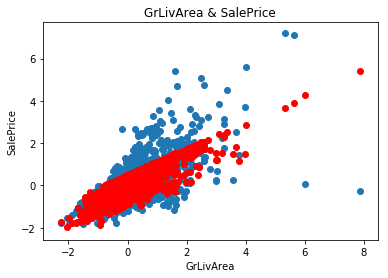

In [1365]:
# 可視化
plt.title("GrLivArea & SalePrice")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.scatter(df_XY_std["GrLivArea"], df_XY_std["SalePrice"])
plt.scatter(df_XY_std["GrLivArea"], y_pred_LR, color = "r")

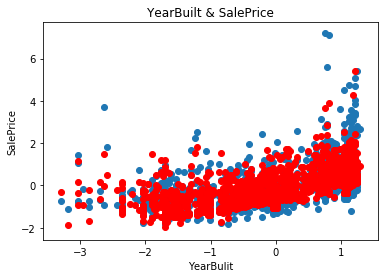

In [1366]:
# 可視化
plt.title("YearBuilt & SalePrice")
plt.xlabel("YearBulit")
plt.ylabel("SalePrice")
plt.scatter(df_XY_std["YearBuilt"], df_XY_std["SalePrice"])
plt.scatter(df_XY_std["YearBuilt"], y_pred_LR, color = "r")

# 【課題3】手法の比較

以下の全ての手法について学習・推定・評価・可視化を行い、指標値を１つの表にまとめる。

その表と可視化した図を利用して結果を簡単に考察し、どの手法がどの指標値が良かったかや、どういった図になっていたかを述ベること。

- 線形回帰
- SVM
- 決定木
- ランダムフォレスト

公式ドキュメントへのリンクは以下。

[sklearn.linear_model.LinearRegression — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

[sklearn.svm.SVR — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

[sklearn.tree.DecisionTreeRegressor — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

[sklearn.ensemble.RandomForestRegressor — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [1367]:
# SVMによる学習、推定、評価、可視化を行う

from sklearn.svm import SVR

# 変数の設定
X = df_XY_std[["GrLivArea", "YearBuilt"]].values # Numpy配列に変換
y = df_XY_std["SalePrice"].values # Numpy配列に変換

# インスタンスの生成
clf_svm = SVR()

# フィッティング
clf_svm.fit(X, y)

# 予測
y_pred_svm = clf_svm.predict(X)

#  決定係数R2
reg_score_svm = clf_svm.score(X, y)

In [1368]:
# 平均二乗誤差
mse_svm = mean_squared_error(y, y_pred_svm)
mse_svm

0.27450692524102854

In [1369]:
# 決定木による学習、推定、評価、可視化を行う

from sklearn.tree import DecisionTreeRegressor

# 変数の設定
X = df_XY_std[["GrLivArea", "YearBuilt"]].values # Numpy配列に変換
y = df_XY_std["SalePrice"].values # Numpy配列に変換

# インスタンスの設定
clf_DT = DecisionTreeRegressor()

# フィッティング
clf_DT.fit(X, y)

# 予測
y_pred_DT = clf_DT.predict(X).reshape(-1,1)

# 決定係数R2
reg_score_DT = clf_DT.score(X,y)

In [1370]:
# 平均二乗誤差
mse_DT = mean_squared_error(y, y_pred_DT)
mse_DT

0.0029028032795415147

In [1371]:
# ランダムフォレストによる学習、推定、評価、可視化を行う

from sklearn.ensemble import RandomForestRegressor

# 変数の設定
X = df_XY_std[["GrLivArea", "YearBuilt"]].values # Numpy配列に変換
y = df_XY_std["SalePrice"].values # Numpy配列に変換

# インスタンスの設定
clf_RF = RandomForestRegressor()

# フィッティング
clf_RF.fit(X, y)

# 予測
y_pred_RF = clf_RF.predict(X)

# 決定係数R2
reg_score_RF = clf_RF.score(X, y)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [1372]:
# 平均二乗誤差
mse_RF = mean_squared_error(y, y_pred_RF)
mse_RF

0.061130318480557694

In [1373]:
# 予測結果を一覧化する

# 方法
classification = np.array(["Linear_Regression", "SVM", "Decision_Tree", "RandomForest"])

# 決定係数R2
reg_score = np.array([reg_score_LR, reg_score_svm, reg_score_DT, reg_score_RF])

# 平均二乗誤差
mean_squared_error = np.array([mse_LR, mse_svm, mse_DT, mse_RF])

# 一覧化
comparison = pd.DataFrame([reg_score, mean_squared_error], index=["reg_score", "mean_squared_error"], columns = classification)
comparison


,Linear_Regression,SVM,Decision_Tree,RandomForest
reg_score,0.65399,0.725493,0.997097,0.93887
mean_squared_error,0.34601,0.274507,0.002903,0.06113


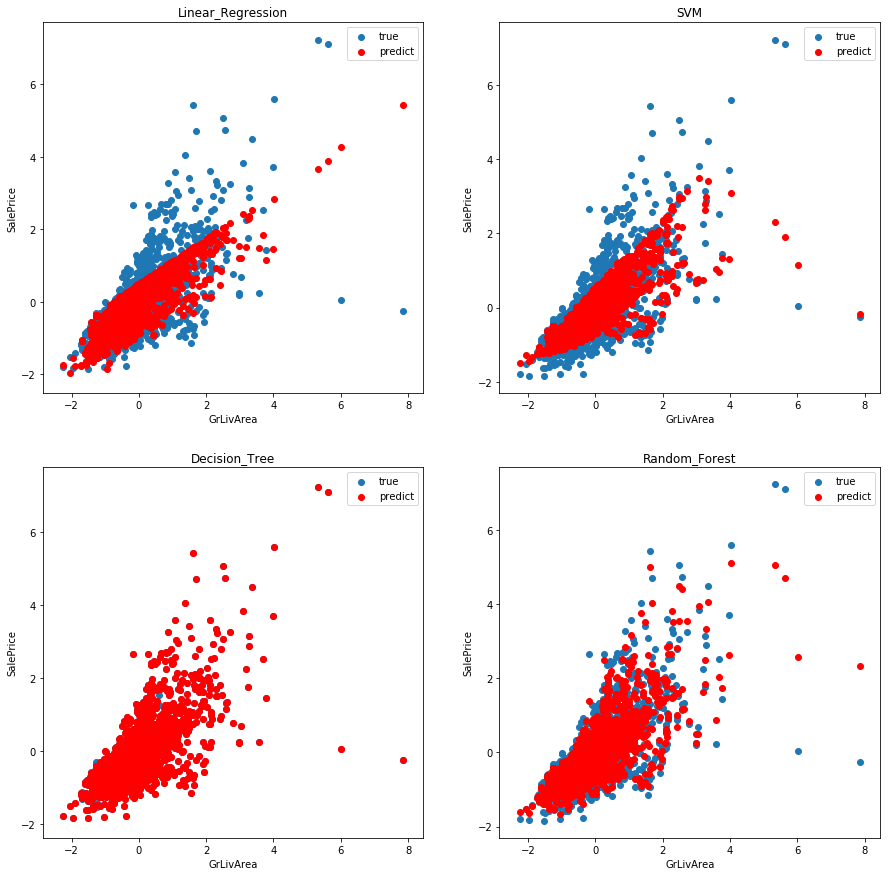

In [1374]:
# 可視化（面積と販売価格）

f, axes = plt.subplots(2,2, figsize=(15, 15))

# 線形回帰
plt.subplot(2,2,1)
plt.title("Linear_Regression")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.scatter(df_XY_std["GrLivArea"], df_XY_std["SalePrice"], label="true")
plt.scatter(df_XY_std["GrLivArea"], y_pred_LR, color = "r", label="predict")
plt.legend()

# SVM
plt.subplot(2,2,2)
plt.title("SVM")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.scatter(df_XY_std["GrLivArea"], df_XY_std["SalePrice"], label="true")
plt.scatter(df_XY_std["GrLivArea"], y_pred_svm, color = "r", label="predict")
plt.legend()

# 決定木
plt.subplot(2,2,3)
plt.title("Decision_Tree")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.scatter(df_XY_std["GrLivArea"], df_XY_std["SalePrice"], label="true")
plt.scatter(df_XY_std["GrLivArea"], y_pred_DT, color = "r", label="predict")
plt.legend()

# ランダムフォレスト
plt.subplot(2,2,4)
plt.title("Random_Forest")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.scatter(df_XY_std["GrLivArea"], df_XY_std["SalePrice"], label="true")
plt.scatter(df_XY_std["GrLivArea"], y_pred_RF, color = "r", label="predict")
plt.legend()

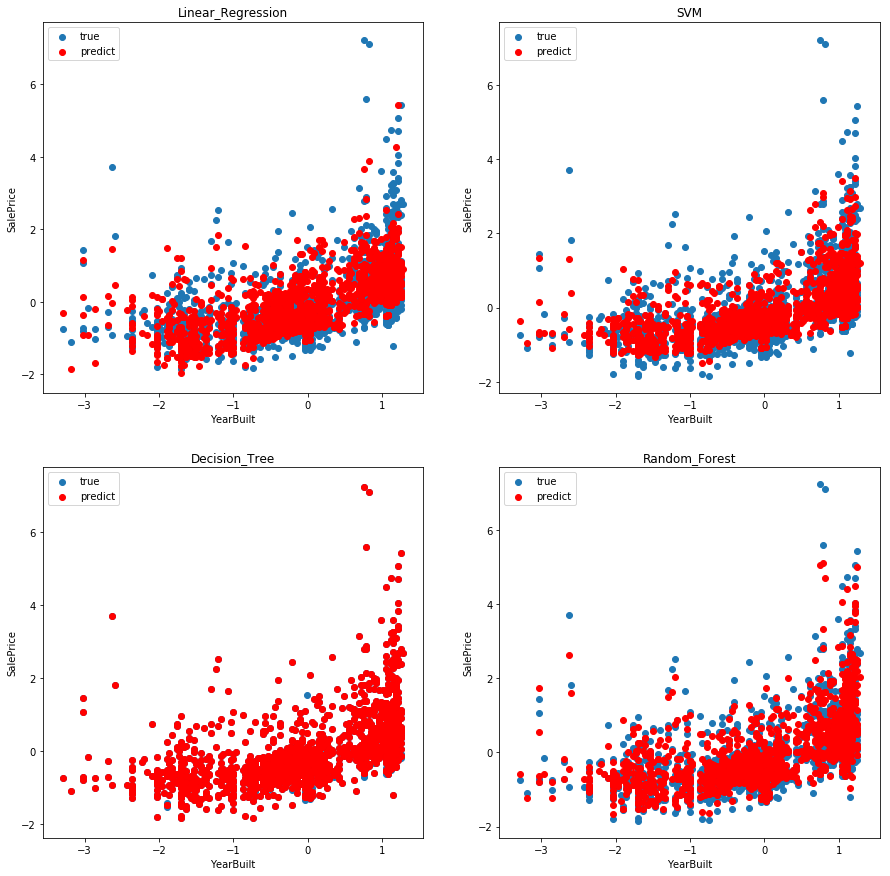

In [1375]:
# 可視化（建築年数と販売価格）

f, axes = plt.subplots(2,2, figsize=(15, 15))

# 線形回帰
plt.subplot(2,2,1)
plt.title("Linear_Regression")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.scatter(df_XY_std["YearBuilt"], df_XY_std["SalePrice"], label="true")
plt.scatter(df_XY_std["YearBuilt"], y_pred_LR, color = "r", label="predict")
plt.legend()

# SVM
plt.subplot(2,2,2)
plt.title("SVM")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.scatter(df_XY_std["YearBuilt"], df_XY_std["SalePrice"], label="true")
plt.scatter(df_XY_std["YearBuilt"], y_pred_svm, color = "r", label="predict")
plt.legend()

# 決定木
plt.subplot(2,2,3)
plt.title("Decision_Tree")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.scatter(df_XY_std["YearBuilt"], df_XY_std["SalePrice"], label="true")
plt.scatter(df_XY_std["YearBuilt"], y_pred_DT, color = "r", label="predict")
plt.legend()

# ランダムフォレスト
plt.subplot(2,2,4)
plt.title("Random_Forest")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.scatter(df_XY_std["YearBuilt"], df_XY_std["SalePrice"], label="true")
plt.scatter(df_XY_std["YearBuilt"], y_pred_RF, color = "r", label="predict")
plt.legend()

# 手法の違いに関する考察

- 平均二乗誤差が最も小さい手法は【決定木】であった。


- 散布図を比較してみると、たしかに【決定木】は予測値（赤い点）と実際の値（青い点）がほぼ重なっており、データに対して当てはまりの良いモデルが生成されていると言えるだろう。

# 【問題4】（アドバンス課題）各パラメータの意味

- 手法のパラメータはデフォルトとしましたが、実際に利用する上ではデフォルトは必ずしも良い設定ではない。

- それぞれの意味を調査した上で複数の設定を試し、その結果を報告すること。

## 1. 線形回帰
  - fit_intercept： intercept（切片）を計算するか否かを設定するパラメータ（デフォルトはTrue）
  - normalize： Trueの場合、回帰実行前に説明変数を正規化する（但し、fit_intecept=Falseの場合は無視される）
  - copy_X：　Trueの場合、説明変数がコピーされる。Falseの場合、上書きされる。
  - n_jobs：演算に用いるジョブの数を表し、intを与える。データ数が多い多変量解析等で高速化を図るもの。


## 2. SVM
  - kernel：カーネルタイプを設定する。選択肢は"linear","poly","rbf"（デフォルト）, "sigmoid", "precomputed", "callable"
  - degree: 多項式カーネル関数の次数（ 'poly'）。 他のすべてのカーネルでは無視される。
  - gamma：「rbf」、「poly」、および「sigmoid」のカーネル係数。
  - coef0：カーネル関数における独立項で、「poly」と「sigmoid」でのみ重要。
  - tol : 停止基準の許容範囲
  - C : 誤差項のペナルティパラメータ。
  - epsilon：イプシロンSVRモデルにおけるイプシロン。
  - shrinking　：　縮小ヒューリスティックを使用するかどうか。
  - cache_size：カーネルキャッシュのサイズ（MB単位）を指定する
  - verbose：Trueで詳細出力を有効にする。 
  - max_iter：ソルバー内での反復回数の制限（制限なしの場合は-1）


## 3. 決定木
  - criterion:分割の品質を測定する機能。 測定基準は"mse"（平均二乗誤差）, "friedman_mse"（分割可能性に対するFriedmanの改善スコアとの二乗平均誤差）, "mae"（平均絶対誤差）
  - splitter：各ノードで分割を選択する戦略。 選択肢は、"best"(最良の分割を選択する）、"random"(最良のランダム分割)
  - max_depth: 決定木の最大深度。 
  - min_samples_split:内部ノードを分割するのに必要なサンプルの最小数
  - min_samples_leaf:リーフノードに必要とされる必要なサンプルの最小数。
  - min_weight_fraction_leaf：リーフノードに必要とされる（すべての入力サンプルの）重みの合計の最小加重部分。
  - max_features：最適な分割を探すときに考慮する性質の数
  - random_state：intの場合は "乱数ジェネレータに使用されるシード値"、 RandomStateInstanceの場合は"乱数ジェネレータ"、 Noneの場合は"np.randomによって使用されるRandomStateインスタンス"となる。
  - max_leaf_nodes：max_leaf_nodesを使って最良の方法で木を成長させる。 最良のノードは、不純物の相対的な減少として定義される。 Noneならリーフノードの数に制限はない。
  - minimpurity_decrease：分割がこの値以上の不純物の減少を引き起こす場合、ノードは分割される。
  - min_impurity_split：木の成長における早期停止の限界
  - presort:フィッティングで最適な分割の発見を早めるためにデータを事前分類するかどうか。


## 4. ランダムフォレスト
  - n_estimators:決定木の数
  - criterion:分割の品質を測定する機能。 測定基準は"mse"（平均二乗誤差）, "friedman_mse"（分割可能性に対するFriedmanの改善スコアとの二乗平均誤差）, "mae"（平均絶対誤差）
  - splitter：各ノードで分割を選択する戦略。 選択肢は、"best"(最良の分割を選択する）、"random"(最良のランダム分割)
  - max_depth: 決定木の最大深度。 
  - min_samples_split:内部ノードを分割するのに必要なサンプルの最小数
  - min_samples_leaf:リーフノードに必要とされる必要なサンプルの最小数。
  - min_weight_fraction_leaf：リーフノードに必要とされる（すべての入力サンプルの）重みの合計の最小加重部分。
  - max_features：最適な分割を探すときに考慮する性質の数
  - max_leaf_nodes：max_leaf_nodesを使って最良の方法で木を成長させる。 最良のノードは、不純物の相対的な減少として定義される。 Noneならリーフノードの数に制限はない。
  - minimpurity_decrease：分割がこの値以上の不純物の減少を引き起こす場合、ノードは分割される。
  - min_impurity_split：木の成長における早期停止の限界
  - bootstrap:木を構築するときにブートストラップサンプルを使用するかどうか。 Falseの場合、データセット全体が各ツリーの構築に使用される。
  - oob_score:不可視なデータの決定係数を推定するためにout-of-bagのサンプルを使うかどうか。
  - n_jobs:適合と予測の両方のために並行して実行するジョブの数
  - random_state：intの場合は "乱数ジェネレータに使用されるシード値"、 RandomStateInstanceの場合は"乱数ジェネレータ"、 Noneの場合は"np.randomによって使用されるRandomStateインスタンス"となる。
  - verbose:近似および予測時の詳細度を制御する。
  - warm_start:Trueに設定すると、以前の呼び出しの解を再利用してより多くの推定量をアンサンブルに追加する。それ以外の場合は、まったく新しいフォレストに近似する。

In [1376]:
# SVMによる学習、推定、評価、可視化を行う

from sklearn.svm import SVR

# 変数の設定
X = df_XY_std[["GrLivArea", "YearBuilt"]].values # Numpy配列に変換
y = df_XY_std["SalePrice"].values # Numpy配列に変換

# インスタンスの生成
clf_svm_new = SVR(gamma = "scale", C=1.0, epsilon=0.2)

# フィッティング
clf_svm_new.fit(X, y)

# 予測
y_pred_svm_new = clf_svm_new.predict(X)

#  決定係数R2
reg_score_svm_new = clf_svm_new.score(X, y)

In [1377]:
# 平均二乗誤差
#mse_svm_new = mean_squared_error(y, y_pred_svm_new)
#mse_svm_new

In [1378]:
# 決定木による学習、推定、評価、可視化を行う

from sklearn.tree import DecisionTreeRegressor

# 変数の設定
X = df_XY_std[["GrLivArea", "YearBuilt"]].values # Numpy配列に変換
y = df_XY_std["SalePrice"].values # Numpy配列に変換

# インスタンスの設定
clf_DT_new = DecisionTreeRegressor(criterion = "mae")

# フィッティング
clf_DT_new.fit(X, y)

# 予測
y_pred_DT_new = clf_DT_new.predict(X)

# 決定係数R2
reg_score_DT_new = clf_DT_new.score(X,y)

In [1379]:
# 平均二乗誤差
#mse_DT_new = mean_squared_error(y, y_pred_DT_new)
#mse_DT_new

In [1380]:
# ランダムフォレストによる学習、推定、評価、可視化を行う

from sklearn.ensemble import RandomForestRegressor

# 変数の設定
X = df_XY_std[["GrLivArea", "YearBuilt"]].values # Numpy配列に変換
y = df_XY_std["SalePrice"].values # Numpy配列に変換

# インスタンスの設定
clf_RF_new = RandomForestRegressor()

# フィッティング
clf_RF_new.fit(X, y)

# 予測
y_pred_RF_new = clf_RF_new.predict(X)

# 決定係数R2
reg_score_RF_new = clf_RF_new.score(X, y)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [1381]:
# 平均二乗誤差
#mse_RF_new = mean_squared_error(y, y_pred_RF_new)
#mse_RF_new

In [1382]:
# 予測結果を一覧化する

# 方法
classification = np.array(["Linear_Regression", "SVM", "Decision_Tree", "RandomForest"])

# 決定係数R2
reg_score = np.array([reg_score_LR, reg_score_svm_new, reg_score_DT_new, reg_score_RF_new])

# 平均二乗誤差
#mean_squared_error = np.array([mse_LR, mse_svm_new, mse_DT_new, mse_RF_new])

# 一覧化
comparison_new = pd.DataFrame([reg_score, mean_squared_error], index=["reg_score", "mean_squared_error"], columns = classification)
comparison

,Linear_Regression,SVM,Decision_Tree,RandomForest
reg_score,0.65399,0.725493,0.997097,0.93887
mean_squared_error,0.34601,0.274507,0.002903,0.06113


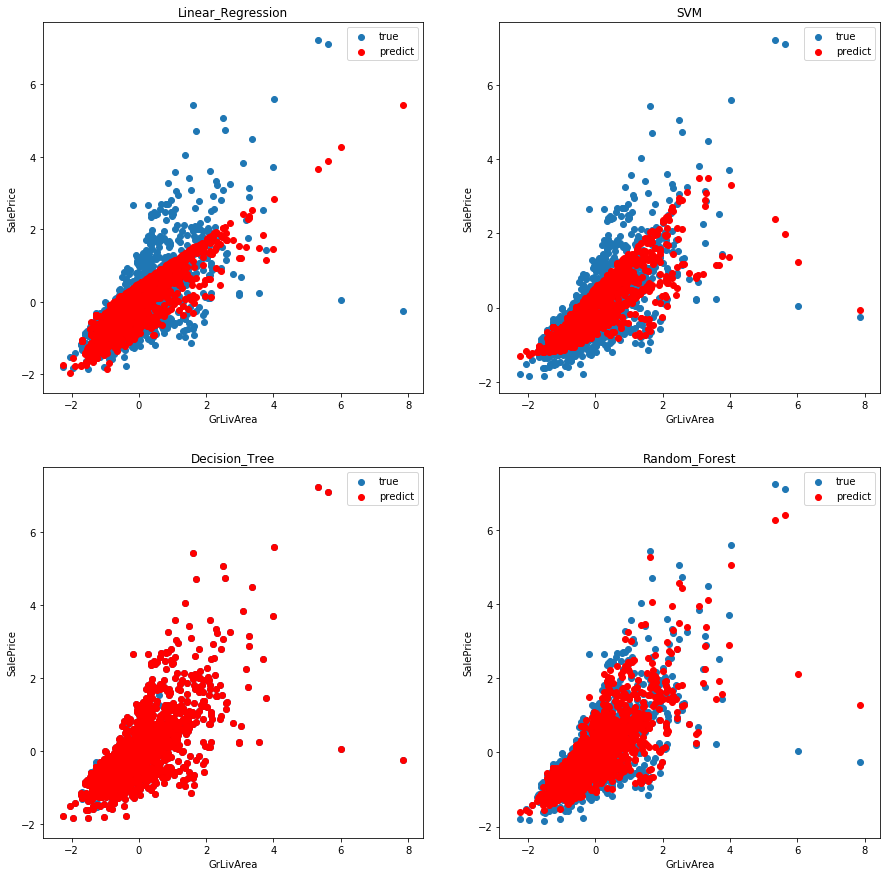

In [1383]:
# 可視化（面積と販売価格）

f, axes = plt.subplots(2,2, figsize=(15, 15))

# 線形回帰
plt.subplot(2,2,1)
plt.title("Linear_Regression")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.scatter(df_XY_std["GrLivArea"], df_XY_std["SalePrice"], label="true")
plt.scatter(df_XY_std["GrLivArea"], y_pred_LR, color = "r", label="predict")
plt.legend()

# SVM
plt.subplot(2,2,2)
plt.title("SVM")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.scatter(df_XY_std["GrLivArea"], df_XY_std["SalePrice"], label="true")
plt.scatter(df_XY_std["GrLivArea"], y_pred_svm_new, color = "r", label="predict")
plt.legend()

# 決定木
plt.subplot(2,2,3)
plt.title("Decision_Tree")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.scatter(df_XY_std["GrLivArea"], df_XY_std["SalePrice"], label="true")
plt.scatter(df_XY_std["GrLivArea"], y_pred_DT_new, color = "r", label="predict")
plt.legend()

# ランダムフォレスト
plt.subplot(2,2,4)
plt.title("Random_Forest")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.scatter(df_XY_std["GrLivArea"], df_XY_std["SalePrice"], label="true")
plt.scatter(df_XY_std["GrLivArea"], y_pred_RF_new, color = "r", label="predict")
plt.legend()

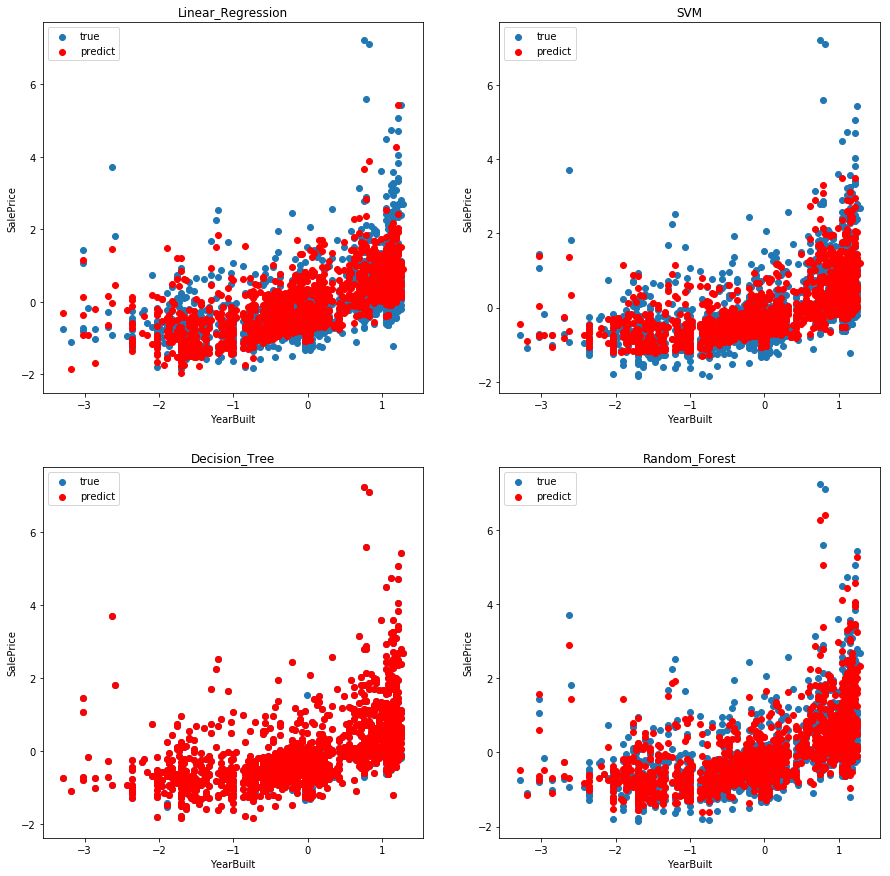

In [1384]:
# 可視化（建築年数と販売価格）

f, axes = plt.subplots(2,2, figsize=(15, 15))

# 線形回帰
plt.subplot(2,2,1)
plt.title("Linear_Regression")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.scatter(df_XY_std["YearBuilt"], df_XY_std["SalePrice"], label="true")
plt.scatter(df_XY_std["YearBuilt"], y_pred_LR, color = "r", label="predict")
plt.legend()

# SVM
plt.subplot(2,2,2)
plt.title("SVM")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.scatter(df_XY_std["YearBuilt"], df_XY_std["SalePrice"], label="true")
plt.scatter(df_XY_std["YearBuilt"], y_pred_svm_new, color = "r", label="predict")
plt.legend()

# 決定木
plt.subplot(2,2,3)
plt.title("Decision_Tree")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.scatter(df_XY_std["YearBuilt"], df_XY_std["SalePrice"], label="true")
plt.scatter(df_XY_std["YearBuilt"], y_pred_DT_new, color = "r", label="predict")
plt.legend()

# ランダムフォレスト
plt.subplot(2,2,4)
plt.title("Random_Forest")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.scatter(df_XY_std["YearBuilt"], df_XY_std["SalePrice"], label="true")
plt.scatter(df_XY_std["YearBuilt"], y_pred_RF_new, color = "r", label="predict")
plt.legend()

# 【問題5】（アドバンス課題）他の特徴量も使用しての学習

- ここまでは練習のために2つの特徴量だけを使ったが、他の特徴量を加えるとどのようになるか検証する。

- どう選択・加工するかにはデータ分析が重要になる。

In [1385]:
df_int = df.select_dtypes(include=int)
df_int.isnull().any() # データ欠損なし

Id               False
MSSubClass       False
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice        False
dtype: bool

 「TotalBsmtSF（Total square feet of basement area）とSalePriceに正の相関がある」との仮説を立て、実際にデータを図示して相関関係を確認してみたい。

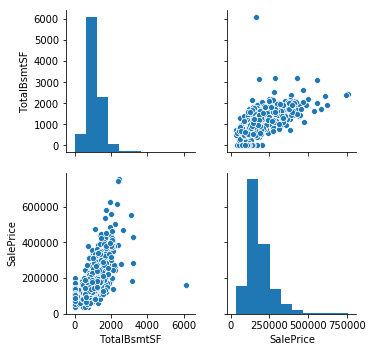

In [1399]:
sns.pairplot(df[["TotalBsmtSF","SalePrice"]])

分布の形状が比較的似ていると思われることから、説明変数にTotalBsmtSFを追加した上で回帰問題を解くこととしたい。

In [1400]:
# 説明変数として、GrLivAreaとYearBuiltを抜き出す
df_X1 = df[["GrLivArea", "YearBuilt"]]

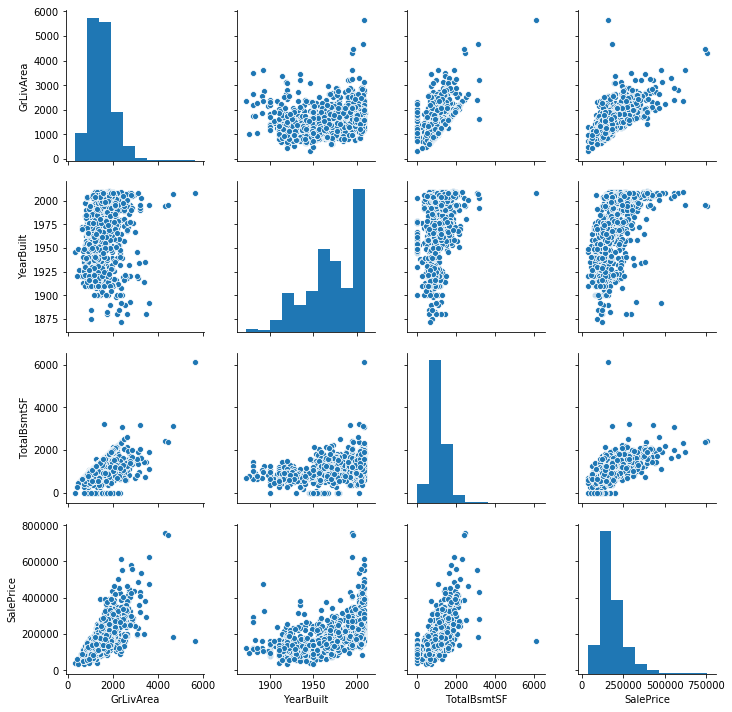

In [1388]:
# 散布図を描く
df_X1Y = pd.concat([df_X1, df_Y], axis = 1)
sns.pairplot(df_X1Y)

In [1389]:
# 説明変数を正規化する
from sklearn.preprocessing import StandardScaler

# インスタンスを生成
ss1 = StandardScaler()

# フィッティング
ss1.fit(df_X1Y)

# 正規化
df_X1Y_std = ss1.transform(df_X1Y)

#  データフレームに変換しておく
df_X1Y_std = pd.DataFrame(df_X1Y_std, columns=["GrLivArea","YearBuilt","TotalBsmtSF","SalePrice"])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


In [1390]:
# 先頭５行を表示
df_X1Y_std.head()

,GrLivArea,YearBuilt,TotalBsmtSF,SalePrice
0,0.370333,1.050994,-0.459303,0.347273
1,-0.482512,0.156734,0.466465,0.007288
2,0.515013,0.984752,-0.313369,0.536154
3,0.383659,-1.863632,-0.687324,-0.515281
4,1.299326,0.951632,0.199680,0.869843


In [1391]:
# 線形回帰による学習、推定、評価、可視化を行う

from sklearn.linear_model import LinearRegression

# 変数の設定
X = df_X1Y_std[["GrLivArea", "YearBuilt", "TotalBsmtSF"]].values # Numpy配列に変換
y = df_X1Y_std["SalePrice"].values # Numpy配列に変換

# インスタンスの生成
clf_LR1 = LinearRegression().fit(X, y)

# 予測値
y_pred_LR1 = clf_LR1.predict(X)

#  決定係数R2
reg_score_LR1 = clf_LR1.score(X, y)

# 回帰係数
coef_LR1 = clf_LR1.coef_

#  切片
intercept_LR1 = clf_LR1.intercept_

In [1396]:
# 線形回帰の決定係数を比較する
reg_score_LR_comparison =  np.array([reg_score_LR, reg_score_LR1])
reg_score_LR_comparison

# データフレームに変換
index = np.array(["TotalBsmtSF_not_added", "TotalBsmtSF_added"])
column = np.array(["reg_score"])
reg_score_LR_comparison = pd.DataFrame(reg_score_LR_comparison, index = index, columns = column)

reg_score_LR_comparison

,reg_score
TotalBsmtSF_not_added,0.653990
TotalBsmtSF_added,0.696126


残念ながら、説明変数にTotalBsmtSFを追加したのみでは、線形回帰の決定係数が然程上昇しなかった。

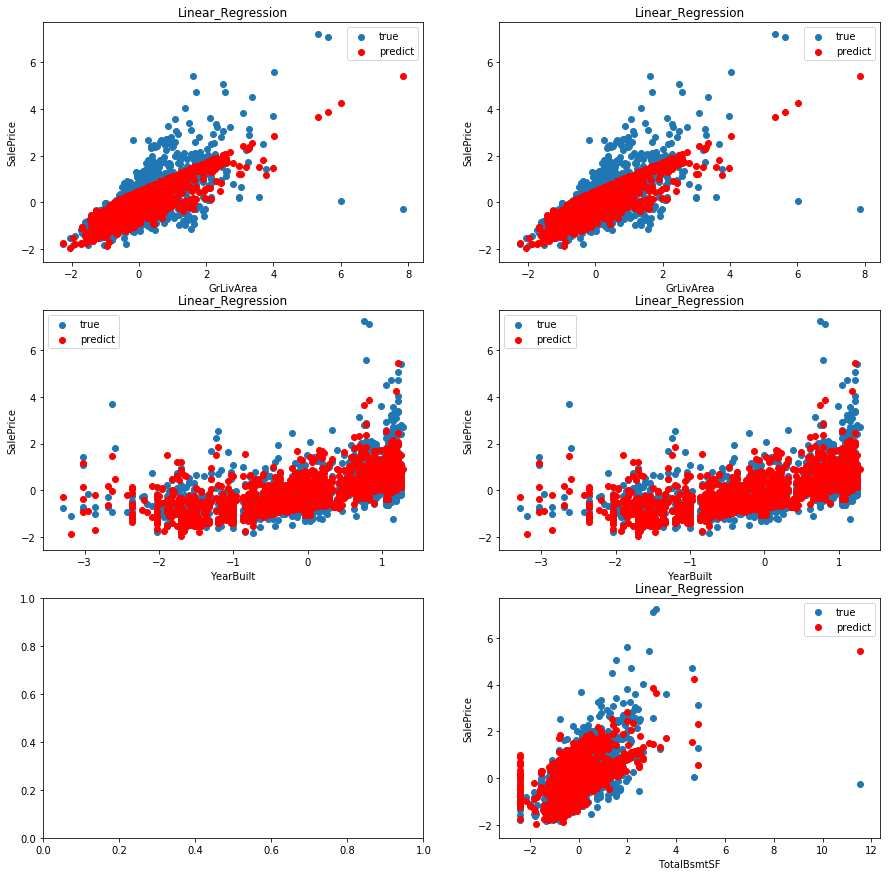

In [1405]:
# 可視化（面積と販売価格）

f, axes = plt.subplots(3,2, figsize=(15, 15))

# TotalBsmtSF追加前
plt.subplot(3,2,1)
plt.title("Linear_Regression")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.scatter(df_XY_std["GrLivArea"], df_XY_std["SalePrice"], label="true")
plt.scatter(df_XY_std["GrLivArea"], y_pred_LR, color = "r", label="predict")
plt.legend()


plt.subplot(3,2,3)
plt.title("Linear_Regression")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.scatter(df_XY_std["YearBuilt"], df_XY_std["SalePrice"], label="true")
plt.scatter(df_XY_std["YearBuilt"], y_pred_LR, color = "r", label="predict")
plt.legend()

# TotalBsmtSF追加後
plt.subplot(3,2,2)
plt.title("Linear_Regression")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.scatter(df_X1Y_std["GrLivArea"], df_X1Y_std["SalePrice"], label="true")
plt.scatter(df_X1Y_std["GrLivArea"], y_pred_LR, color = "r", label="predict")
plt.legend()


plt.subplot(3,2,4)
plt.title("Linear_Regression")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.scatter(df_X1Y_std["YearBuilt"], df_X1Y_std["SalePrice"], label="true")
plt.scatter(df_X1Y_std["YearBuilt"], y_pred_LR, color = "r", label="predict")
plt.legend()


plt.subplot(3,2,6)
plt.title("Linear_Regression")
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")
plt.scatter(df_X1Y_std["TotalBsmtSF"], df_X1Y_std["SalePrice"], label="true")
plt.scatter(df_X1Y_std["TotalBsmtSF"], y_pred_LR, color = "r", label="predict")
plt.legend()